<a href="https://colab.research.google.com/github/SamaraV3/Netflix-Analytics/blob/main/Netflix_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ADD DATASETS BEFORE RUNNING ANYTHING

In [ ]:
titles_df = pd.read_csv('titles.csv')

In [ ]:
credits_df = pd.read_csv('credits.csv')
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None


In [ ]:
#Cleaning the data so that the object types are now int types
for column in titles_df:
  if titles_df.dtypes[column]=='object':
    titles_df[column] = titles_df[column].astype(pd.StringDtype())

for column in credits_df:
  if credits_df.dtypes[column]=='object':
    credits_df[column] = credits_df[column].astype(pd.StringDtype())
print(titles_df.info())
print(credits_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   string 
 1   title                 5850 non-null   string 
 2   type                  5850 non-null   string 
 3   description           5850 non-null   string 
 4   release_year          5850 non-null   int64  
 5   age_certification     5850 non-null   string 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   string 
 8   production_countries  5850 non-null   string 
 9   seasons               5850 non-null   int64  
 10  imdb_id               5850 non-null   string 
 11  imdb_score            5850 non-null   float64
 12  imdb_votes            5850 non-null   int64  
 13  tmdb_popularity       5850 non-null   int64  
 14  tmdb_score            5850 non-null   float64
dtypes: float64(2), int64(

In [ ]:
#Want to run basic analytics. Lets find data (and visualize data) frequencies of different genres.
#lets make a dictionary where the keys will be each genre name and their values will be their counts
#for each row in titles[genres], remove the brackets on the ends of the string and then split it using the , char

#2nd analytics: comparing imdb and tmdb average scores based on the genre
#will have 2 more dictionaries: imdbGenreScores and tmdbGenreScores
#will add to these for each row in the dataset
#1 issue: i later on sort the genreFreqs dictionary. will just use dictionary keys when I make the graph

#Here is the dictionary of genre frequencies
genreFreqs = {}
#Here are the imdb and tmdb dictionaries
imdbGenreScores = {}
tmdbGenreScores = {}
total_sum = 0
#another issue: did a for loop on rows in 1 column so cannot access other column info
#for now will get around this by using another variable to keep track of the row number
row_num = 0
for row in titles_df['genres']:
  #Below lines clean up the row before splitting it into a list
  row = row.replace('[', '')
  row = row.replace(']', '')
  row = row.replace('\'', '')
  row = row.replace('\'', '')
  #This is the list of genres for the specified row
  genre_list = row.split(', ')
  #iterate over genre_list
  for genre in genre_list:
    #if genreFreqs is empty just add the genre. Otherwise check if a key exists and act accordingly
    if genre in genreFreqs:
      genreFreqs[genre] += 1
      #also add to respective imdb and tmdb scores
      imdbGenreScores[genre] += titles_df['imdb_score'][row_num]
      tmdbGenreScores[genre] += titles_df['tmdb_score'][row_num]
    else:
      genreFreqs[genre] = 1
      #also create new dict values in imdb and tmdb dictionaries
      imdbGenreScores[genre] = titles_df['imdb_score'][row_num]
      tmdbGenreScores[genre] = titles_df['tmdb_score'][row_num]
    total_sum += 1
  row_num += 1
print(genreFreqs)
print(imdbGenreScores)
print(tmdbGenreScores)

{'documentation': 952, 'drama': 2968, 'crime': 936, 'action': 1157, 'thriller': 1228, 'european': 443, 'fantasy': 630, 'comedy': 2325, 'war': 163, 'romance': 971, 'western': 41, 'history': 254, 'music': 262, 'family': 682, 'horror': 378, 'scifi': 589, 'animation': 705, 'reality': 234, 'sport': 170, '': 59}
{'documentation': 6020.899999999998, 'drama': 18727.800000000036, 'crime': 6045.2000000000035, 'action': 7120.800000000004, 'thriller': 7514.899999999997, 'european': 2794.700000000004, 'fantasy': 4059.5, 'comedy': 14182.599999999973, 'war': 1095.2, 'romance': 6091.799999999996, 'western': 252.90000000000003, 'history': 1810.6999999999978, 'music': 1589.0, 'family': 4128.700000000001, 'horror': 2198.2999999999997, 'scifi': 3665.2999999999993, 'animation': 4222.3, 'reality': 1403.8999999999999, 'sport': 1130.8999999999999, '': 43.5}
{'documentation': 6429.339999999999, 'drama': 19558.510999999988, 'crime': 6261.894000000002, 'action': 7665.498000000002, 'thriller': 7978.6900000000005,

In [ ]:
#reorder dictionary from largest to smallest frequency
#also wanna change the name of the nameless key to none specified
genreFreqs['none specified'] = genreFreqs.pop('')
genreFreqs = dict(sorted(genreFreqs.items(), key=lambda x:x[1], reverse=True))
#rename blank genre for the imdb and tmdb dicts as well
imdbGenreScores['none specified'] = imdbGenreScores.pop('')
tmdbGenreScores['none specified'] = tmdbGenreScores.pop('')

print(genreFreqs)

{'drama': 2968, 'comedy': 2325, 'thriller': 1228, 'action': 1157, 'romance': 971, 'documentation': 952, 'crime': 936, 'animation': 705, 'family': 682, 'fantasy': 630, 'scifi': 589, 'european': 443, 'horror': 378, 'music': 262, 'history': 254, 'reality': 234, 'sport': 170, 'war': 163, 'none specified': 59, 'western': 41}


In [ ]:
#now that I have the sum of scores by genre, I want their averages. iterate through key values to find this

for key in genreFreqs.keys():
  imdbGenreScores[key] /= genreFreqs[key]
  tmdbGenreScores[key] /= genreFreqs[key]

print(imdbGenreScores)
print(tmdbGenreScores)

{'documentation': 6.324474789915964, 'drama': 6.30990566037737, 'crime': 6.458547008547012, 'action': 6.1545375972342296, 'thriller': 6.119625407166121, 'european': 6.308577878103846, 'fantasy': 6.443650793650794, 'comedy': 6.100043010752676, 'war': 6.719018404907976, 'romance': 6.273738414006175, 'western': 6.16829268292683, 'history': 7.128740157480306, 'music': 6.064885496183206, 'family': 6.053812316715543, 'horror': 5.815608465608465, 'scifi': 6.222920203735143, 'animation': 5.989078014184398, 'reality': 5.999572649572649, 'sport': 6.65235294117647, 'none specified': 0.7372881355932204}
{'documentation': 6.7535084033613435, 'drama': 6.5897948113207505, 'crime': 6.690057692307694, 'action': 6.6253223854796905, 'thriller': 6.497304560260587, 'european': 6.521311512415351, 'fantasy': 7.022858730158715, 'comedy': 6.483393978494626, 'war': 6.994582822085892, 'romance': 6.548265705458289, 'western': 6.717585365853658, 'history': 7.078811023622048, 'music': 6.61648854961832, 'family': 6.

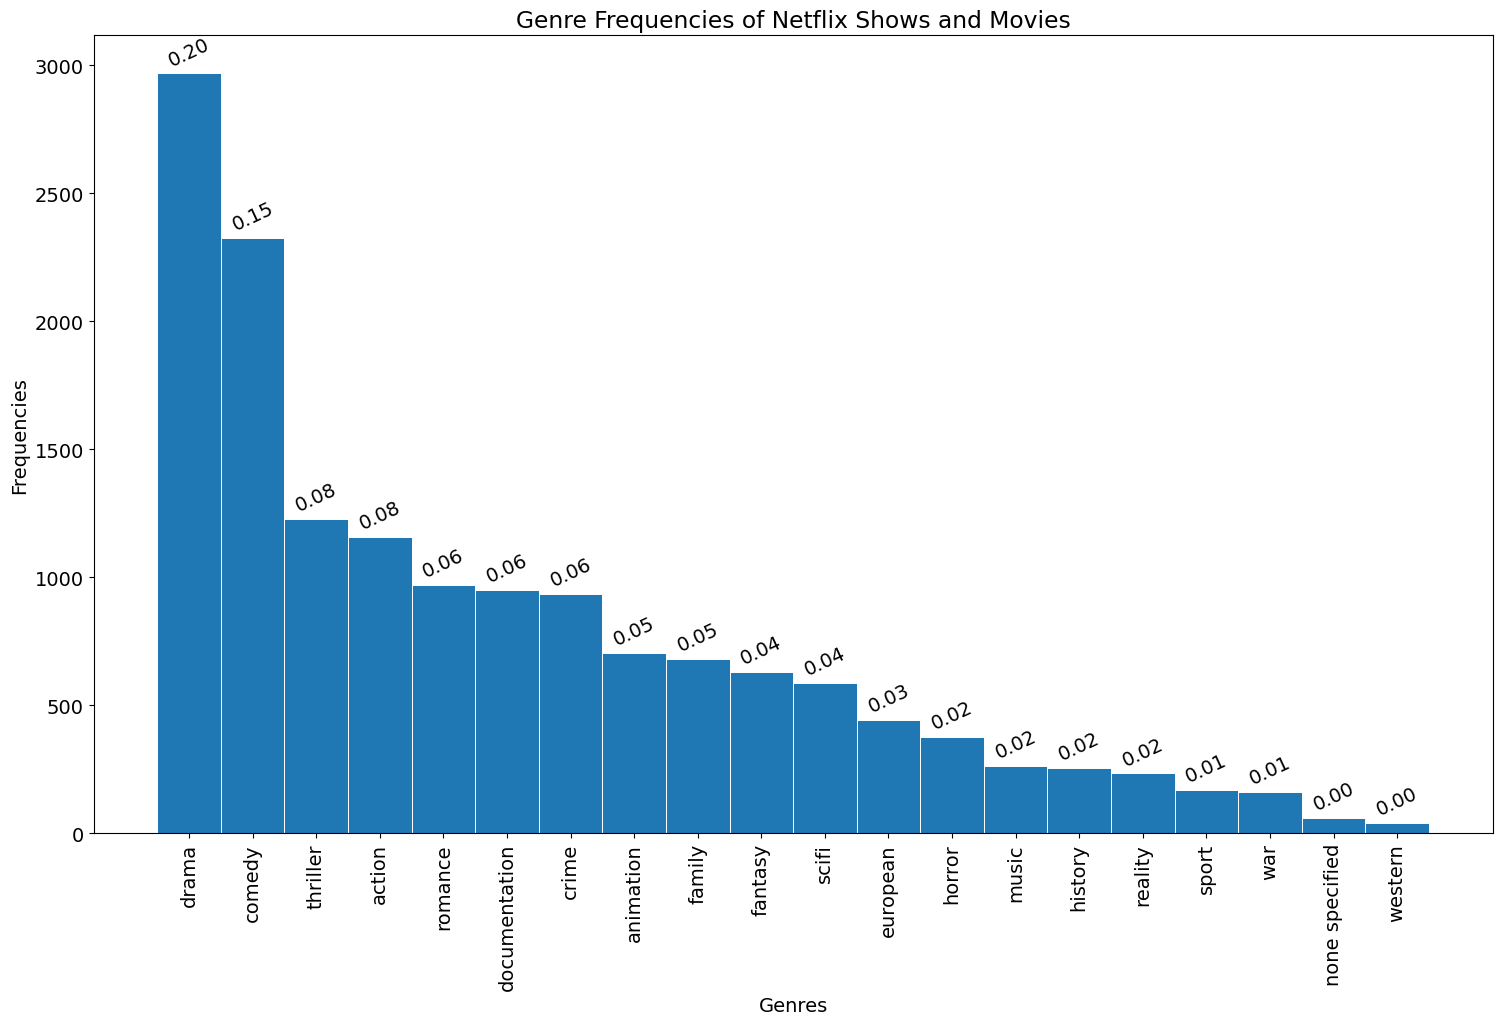

In [ ]:
#now visualize the genre commonality data in a bar graph
x_axis = np.fromiter(genreFreqs.keys(), dtype='<U20')
y_axis = np.fromiter(genreFreqs.values(), dtype=int)

fig, ax = plt.subplots(figsize=(15, 10))

bars = ax.bar(x_axis, y_axis, width=1, edgecolor='white', linewidth=0.7, align='center')
plt.rcParams.update({'font.size': 14})

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(14)
#wanna add percentages to top of graph
for i, bar in enumerate(bars):
  height = y_axis[i]
  ratio = height/total_sum
  ax.annotate(f'{ratio:.2f}',  # Format ratio to 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords='offset points',
                ha='center', va='bottom',
                rotation=25, fontsize=14)  # Center alignment

plt.tight_layout()
ax.set_title('Genre Frequencies of Netflix Shows and Movies')
ax.set_xlabel('Genres', fontsize=14)
ax.set_ylabel('Frequencies', fontsize=14)
plt.show()

<Figure size 640x480 with 0 Axes>

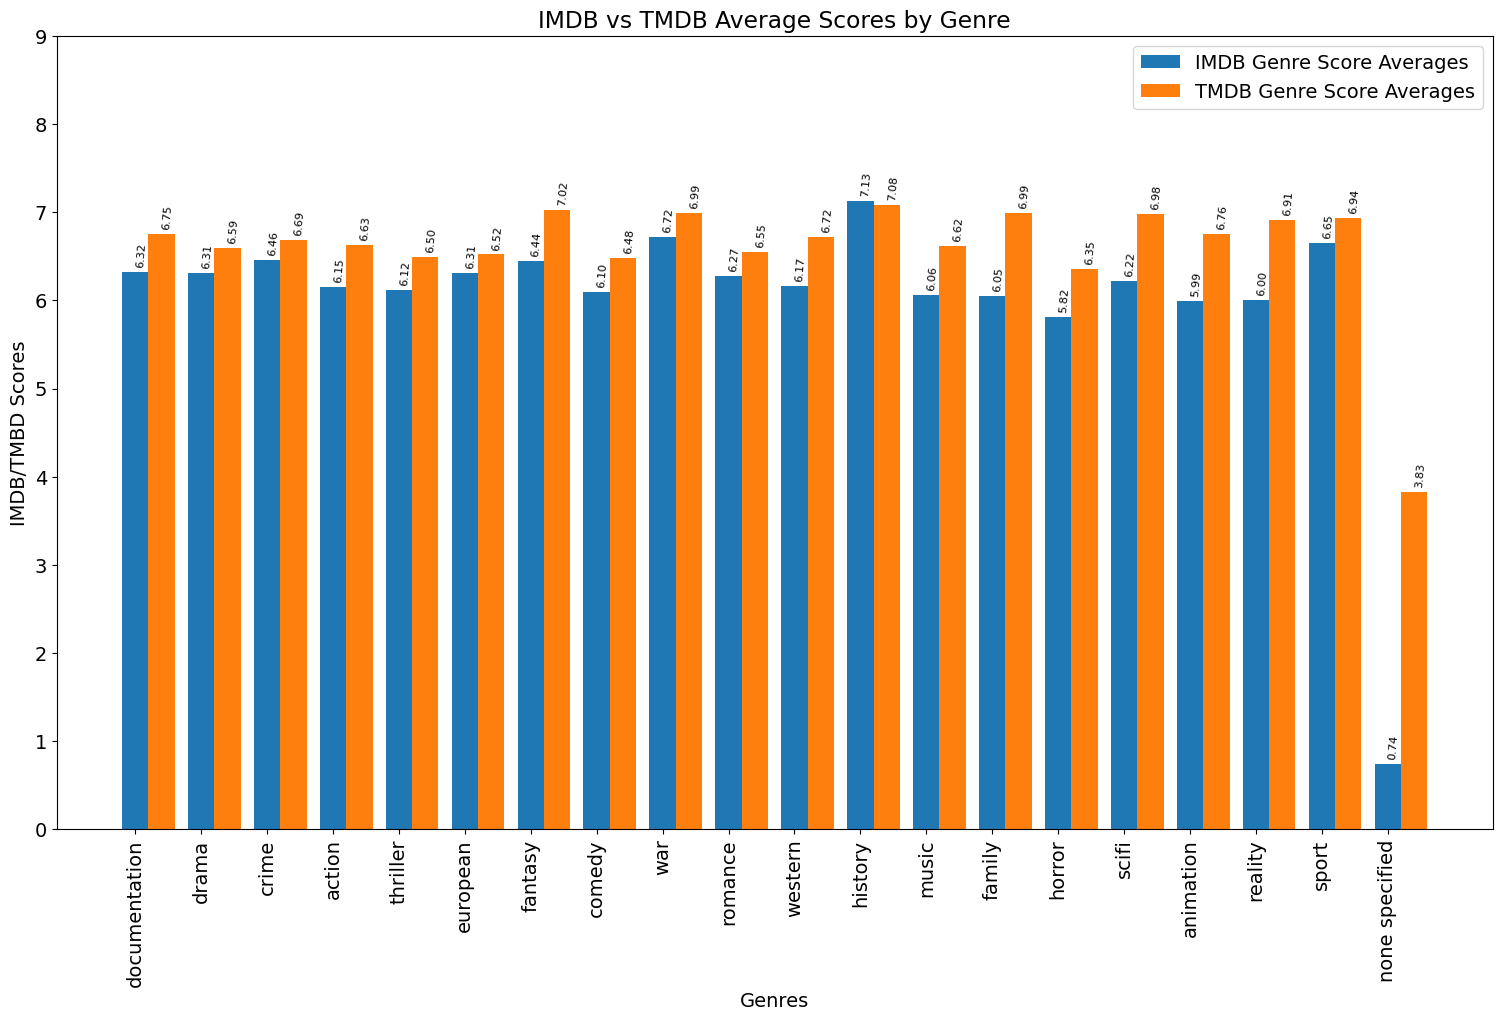

In [ ]:
plt.clf()#clears old bar graph

#now visualize the score data using a double bar chart!
x_axis = np.fromiter(imdbGenreScores.keys(), dtype='<U20')
y_axis_imdb = np.fromiter(imdbGenreScores.values(), dtype=float)
z_axis_tmdb = np.fromiter(tmdbGenreScores.values(), dtype=float)
fig2, ax2 = plt.subplots(figsize=(15, 10))

#below used to space out x-axis labels evenly
x_axis_spaced = np.arange(len(x_axis))
#add bars to bar graph
bars1 = ax2.bar(x_axis_spaced, y_axis_imdb, 0.4, label = 'IMDB Genre Score Averages')
bars2 = ax2.bar(x_axis_spaced+0.4, z_axis_tmdb, 0.4, label = 'TMDB Genre Score Averages')
#rename x-axis values here
plt.xticks(x_axis_spaced, x_axis)
ax2.set_ylim([0, 9])#makes it prettier :3

#making tick labels prettier
for tick in ax2.get_xticklabels():
  tick.set_rotation(90)
  tick.set_fontsize(14)
#adding percentage values at top of bar graphs

#wanna add percentages to top of graph
for i, bar in enumerate(bars1):
  genre = list(imdbGenreScores.keys())[i]
  score = imdbGenreScores[genre]
  height = bar.get_height()#gets height of bar
  ax2.annotate(f'{score:.2f}',  # Format ratio to 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords='offset points',
                ha='left', va='bottom',
                rotation=85, fontsize=8)  # Center alignment
for i, bar in enumerate(bars2):
  genre = list(tmdbGenreScores.keys())[i]
  score = tmdbGenreScores[genre]
  height = bar.get_height()#gets height of bar
  ax2.annotate(f'{score:.2f}',  # Format ratio to 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the top of the bar
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords='offset points',
                ha='left', va='bottom',
                rotation=85, fontsize=8)  # Center alignment

#labeling
plt.tight_layout()
ax2.set_title('IMDB vs TMDB Average Scores by Genre')
ax2.set_xlabel('Genres', fontsize=14)
ax2.set_ylabel('IMDB/TMBD Scores', fontsize=14)
plt.legend()
plt.show()


In [ ]:
#Last thing to include: compute statistical difference (if it exists) between average scores for both camps
#Null hypothesis: No significant difference between the scores
#Alternative hypothesis: There is a significant difference between the scores
#Significance Level: 0.05

#CANNOT DO THIS since i did not save the data in a list feature lol
#may implement in le future
